### Data incubator sentiment analysis capstone project

### Project Title: Classification of  Sentiment Analysis 

### Introduction

**LyX** is an open source graphical user interface document processor based on the **LaTeX** typesetting system. It was developed by Matthias Ettrich in 1995 with the name of **Lyrix**. Shortly after the initial release, Lyrix was renamed to LyX since the  name clash with a word processor produced by the company **Santa Cruz Operation.** Unlike most word processors, which follow the WYSIWYG ("what you see is what you get") paradigm, LyX has a WYSIWYM ("what you see is what you mean") approach, where what shows up on the screen roughly depicts the semantic structure of the page and is only an approximation of the document produced by TeX.Since LyX relies on the typesetting system of LaTeX without being a full-fledged LaTeX editor itself, it has the power and flexibility of LaTeX, and can handle documents including books, notes, theses, to academic papers, letters, etc.<a href="https://en.wikipedia.org/wiki/LyX"> source</a>.

##### Objective of the study
A classification model will be used to predict the sentiment of each tweet about Lyx such as:  Logistic Regression,K-Nearst Neighbors,(KNN),Suportive vector Machine(SVM),Linear Discrimnant Analysis(LDA),Quadratic Discriminant Analysis (QDA),Decision Trees,Random Forest,Gradient Boosting,Adaptive Boosting,CatBoos Classifier,Light Gradient Boosting,Extreme Gradient Boosting,Long Short-Term Memory(LSTM) of these a better model will be selected <a source</a>
   

### Data Stracture

 In this study 1,049,074 number of tweets with corresponding six variables such as:**Polarity_Tweet**:the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive),**ID**:the id of the tweet,**Date**:the date of the tweet,**Query**:If there is no query, then this value is NO_QUERY,**User**:the user that tweeted (robotickilldozr) and **Text**:the text of the tweet are included <a href="http://help.sentiment140.com/for-students"> source</a>.


In [1]:
## important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
import re
warnings.filterwarnings('ignore')

### Reading the data

In [2]:
## reading the train data set
df_train=pd.read_csv(r'C:\Users\aklil\OneDrive\Desktop\Aklilu_resume\Data_incubater_challenge\Capstone_project\lyx_data\training.csv',header=None)
df_train.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
### Naming the columns
df_train.columns=['Polarity_Tweet','ID','Date','Query','User','Text']

In [4]:
df_train.head()

,Polarity_Tweet,ID,Date,Query,User,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
df_train.shape

(1048576, 6)

In [6]:
## changing the Date format into date time format
df_train['Date']=pd.to_datetime(df_train['Date'])
df_train.head()

,Polarity_Tweet,ID,Date,Query,User,Text
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [7]:
df_train.shape

(1048576, 6)

In [8]:
import random

In [9]:
### lets randomly select a single tweet to display
i=random.randint(0,len(df_train))
df_train['Text'][i]

"got a good fifteen minutes of kitten cuddle time in. it's potato's last night with us "

In [10]:
len(df_train['Text'].values)### there is no any missing in the Text variable

1048576

In [11]:
### reading the test data set
df_test=pd.read_csv(r'C:\Users\aklil\OneDrive\Desktop\Aklilu_resume\Data_incubater_challenge\Capstone_project\lyx_data\test.csv',header=None)
df_test.head(3)

,0,1,2,3,4,5
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."


In [12]:
df_test.shape

(498, 6)

In [13]:
## rename columns
df_test.columns=['Polarity_Tweet','ID','Date','Query','User','Text']

In [14]:
df_test['Date'].unique()[0:10]

array(['Mon May 11 03:17:40 UTC 2009', 'Mon May 11 03:18:03 UTC 2009',
       'Mon May 11 03:18:54 UTC 2009', 'Mon May 11 03:19:04 UTC 2009',
       'Mon May 11 03:21:41 UTC 2009', 'Mon May 11 03:22:00 UTC 2009',
       'Mon May 11 03:22:30 UTC 2009', 'Mon May 11 03:26:10 UTC 2009',
       'Mon May 11 03:27:15 UTC 2009', 'Mon May 11 03:29:20 UTC 2009'],
      dtype=object)

In [15]:
## to change the date data type into datetime
df_test['Date']=pd.to_datetime(df_test['Date'])
df_test.head(10)

,Polarity_Tweet,ID,Date,Query,User,Text
0,4,3,2009-05-11 03:17:40+00:00,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,2009-05-11 03:18:03+00:00,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,2009-05-11 03:18:54+00:00,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,2009-05-11 03:19:04+00:00,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,2009-05-11 03:21:41+00:00,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...
5,4,8,2009-05-11 03:22:00+00:00,kindle2,GeorgeVHulme,@richardebaker no. it is too big. I'm quite ha...
6,0,9,2009-05-11 03:22:30+00:00,aig,Seth937,Fuck this economy. I hate aig and their non lo...
7,4,10,2009-05-11 03:26:10+00:00,jquery,dcostalis,Jquery is my new best friend.
8,4,11,2009-05-11 03:27:15+00:00,twitter,PJ_King,Loves twitter
9,4,12,2009-05-11 03:29:20+00:00,obama,mandanicole,how can you not love Obama? he makes jokes abo...


### we can add hours or minutes or seconds to datetime 

In [16]:
## Adding hours or minutes or seconds to datetime
from datetime import datetime, timedelta

In [17]:
### since the data in the train data set is in PDT it is 7 hour behind the UTC so that to adjust
#it we will didact 7 hour from the UTC time in the test data set be for concat the two data
df_test['Date']=df_test['Date']-timedelta(hours=7)


In [18]:
df_test.head()

,Polarity_Tweet,ID,Date,Query,User,Text
0,4,3,2009-05-10 20:17:40+00:00,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,2009-05-10 20:18:03+00:00,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,2009-05-10 20:18:54+00:00,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,2009-05-10 20:19:04+00:00,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,2009-05-10 20:21:41+00:00,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...


### Getting some important variables

In [19]:
#df['Date']=pd.to_datetime(df['Date'])

In [20]:
df_train['Year']=df_train['Date'].dt.year
df_train['Month']=df_train['Date'].dt.month
df_train['Day']=df_train['Date'].dt.day
df_train['WeekDay']=df_train['Date'].dt.weekday

In [21]:
df_train.shape

(1048576, 10)

In [22]:
df_train['Query'].unique()

array(['NO_QUERY'], dtype=object)

In [23]:
df_test['Year']=df_test['Date'].dt.year
df_test['Month']=df_test['Date'].dt.month
df_test['Day']=df_test['Date'].dt.day
df_test['WeekDay']=df_test['Date'].dt.weekday## to get the week days

In [24]:
df_test.shape

(498, 10)

## lets combine the two data sets for further data analysis

In [25]:
## Append the two data sets
df=pd.concat([df_train,df_test],axis=0)
df.shape

(1049074, 10)

In [26]:
## lets look the top six rows of the data frame
df.head()

,Polarity_Tweet,ID,Date,Query,User,Text,Year,Month,Day,WeekDay
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",2009,4,6,0
1,0,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,2009,4,6,0
2,0,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,2009,4,6,0
3,0,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,2009,4,6,0
4,0,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",2009,4,6,0


In [27]:
df['length_text']=df['Text'].apply(lambda x:len(x))

In [28]:
df['Polarity_Tweet'].value_counts()

0    800177
4    248758
2       139
Name: Polarity_Tweet, dtype: int64

In [29]:
df['Polarity_Tweet'].value_counts(normalize=True)*100

0    76.27460
4    23.71215
2     0.01325
Name: Polarity_Tweet, dtype: float64

#### Since the percentage of the nuetral tweet  very small about 0.013%, we will discard that category 

In [30]:
## discard all the neutral tweets since they are very small,0.013% of the tweets
df=df[df['Polarity_Tweet']!=2]

In [31]:
## to map the diferent category into positive and negative tweet
def polarity(var):
    if var==0:
        return 'Negative'
    elif var==4:
        return 'Positive'

In [32]:
df['Polarity_Tweet']=df['Polarity_Tweet'].apply(polarity)

In [33]:
df.columns

Index(['Polarity_Tweet', 'ID', 'Date', 'Query', 'User', 'Text', 'Year',
       'Month', 'Day', 'WeekDay', 'length_text'],
      dtype='object')

In [34]:
df=df[['ID', 'Date', 'Query', 'User', 'Text', 'Year','Month', 'Day', 'WeekDay','length_text','Polarity_Tweet']]

In [35]:
df.head()

,ID,Date,Query,User,Text,Year,Month,Day,WeekDay,length_text,Polarity_Tweet
0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",2009,4,6,0,115,Negative
1,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,2009,4,6,0,111,Negative
2,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,2009,4,6,0,89,Negative
3,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,2009,4,6,0,47,Negative
4,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",2009,4,6,0,111,Negative


In [36]:
### to have an insite on the data set data type
df.dtypes

ID                 int64
Date              object
Query             object
User              object
Text              object
Year               int64
Month              int64
Day                int64
WeekDay            int64
length_text        int64
Polarity_Tweet    object
dtype: object

In [37]:
## check for missingness of each variable
df.isnull().sum()# all variables has no missing values

ID                0
Date              0
Query             0
User              0
Text              0
Year              0
Month             0
Day               0
WeekDay           0
length_text       0
Polarity_Tweet    0
dtype: int64

### Exploratory Data Analysis

In [42]:
df.describe(include='object').transpose()

,count,unique,top,freq
Date,1048935,662813,2009-05-22 05:10:17,17
Query,1048935,74,NO_QUERY,1048576
User,1048935,511636,lost_dog,549
Text,1048935,1036495,isPlayer Has Died! Sorry,210
Polarity_Tweet,1048935,2,Negative,800177


In [45]:
df['Polarity_Tweet'].value_counts().reset_index().rename(columns={'index':'Polarity_Tweet','Polarity_Tweet':'Number_tweet'})

,Polarity_Tweet,Number_tweet
0,Negative,800177
1,Positive,248758


###  Data Visualization

In [46]:
df['Query'].unique()[0:10]

array(['NO_QUERY', 'kindle2', 'aig', 'jquery', 'twitter', 'obama', 'nike',
       'lebron', 'iphone app', 'visa'], dtype=object)

In [47]:
df['ID'].nunique()

1048404

In [48]:
df['Query'].value_counts().reset_index().head()

,index,Query
0,NO_QUERY,1048576
1,time warner,33
2,lebron,18
3,kindle2,17
4,gm,16


In [49]:
## to display the first ten top quearries percentage
df_query=(df['Query'].value_counts(normalize=True)*100).reset_index().rename(columns={'index':'Query','Query':'Percentage'})
df_qsorted=df_query.sort_values('Percentage',ascending=False)
df_qsorted.head()

,Query,Percentage
0,NO_QUERY,99.965775
1,time warner,0.003146
2,lebron,0.001716
3,kindle2,0.001621
4,gm,0.001525


### Top ten queries

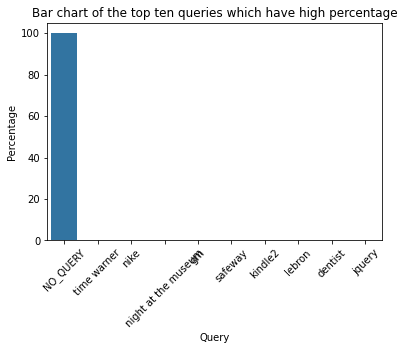

In [50]:
#Bar chart of the top ten queries which have high percentage
sns.barplot(df_qsorted.iloc[0:10,:]['Query'],df_qsorted.iloc[0:10,:]['Percentage'])
plt.title('Bar chart of the top ten queries which have high percentage')
plt.xticks(range(10),['NO_QUERY','time warner','nike','night at the museum','gm','safeway','kindle2','lebron','dentist','jquery'],rotation=45)
plt.show()

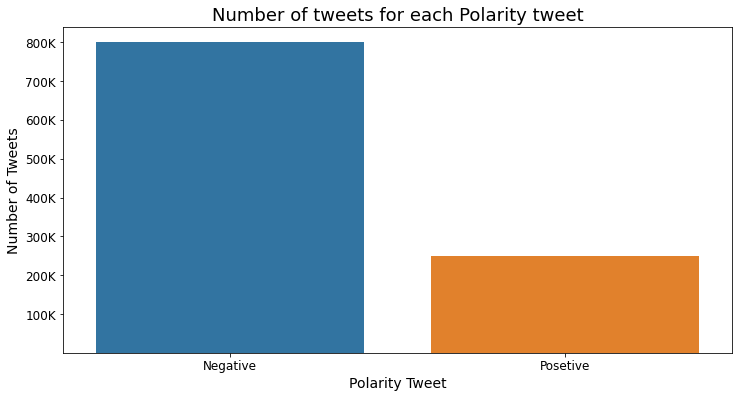

In [51]:
## Bar chart of the sentiments
plt.figure(figsize=(12,6))
sns.countplot(df['Polarity_Tweet'])
plt.title('Number of tweets for each Polarity tweet',fontsize=18)
plt.xlabel('Polarity Tweet',fontsize=14)
plt.ylabel('Number of Tweets',fontsize=14)
plt.xticks(range(2),['Negative','Posetive'],fontsize=12)
plt.yticks([100000,200000,300000,400000,500000,600000,700000,800000],['100K','200K','300K','400K','500K','600K','700K','800K'],fontsize=12)
plt.show()

In [52]:
df['Polarity_Tweet'].unique()

array(['Negative', 'Positive'], dtype=object)

In [53]:
## average length of each tweet
df.groupby('Polarity_Tweet')['length_text'].mean().reset_index().rename(columns={'length_text':'Average_text_length'})

,Polarity_Tweet,Average_text_length
0,Negative,74.304073
1,Positive,74.290535


In [54]:
### standard devaiation of each tweet
df.groupby('Polarity_Tweet')['length_text'].std().reset_index().rename(columns={'length_text':'std_text_length'})

,Polarity_Tweet,std_text_length
0,Negative,36.743669
1,Positive,36.146365


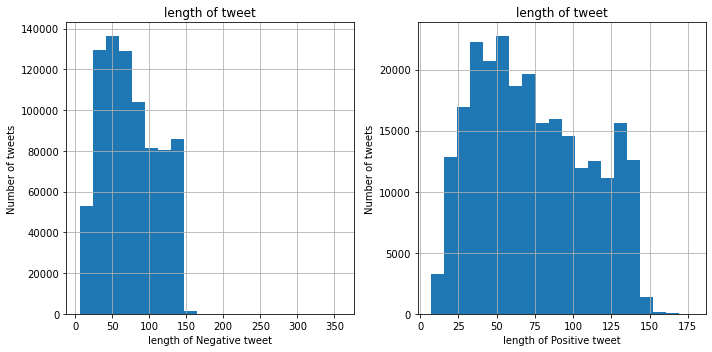

In [55]:
### histogram of both polarity tweet length
plot_num=1
plt.figure(figsize=(10,5))
for var in df['Polarity_Tweet'].unique():
    plt.subplot(1,2,plot_num)
    
    plt.hist(df[df['Polarity_Tweet']==var]['length_text'],bins=20)
    plt.title('length of tweet')
    plt.xlabel('length of '+ var+' '+'tweet')
    plt.ylabel('Number of tweets')
    plt.xlim(0,173)
    plt.tight_layout()
    plt.grid(True)
    plot_num+=1

plt.show()

In [56]:
df['Month'].unique()

array([4, 5, 6], dtype=int64)

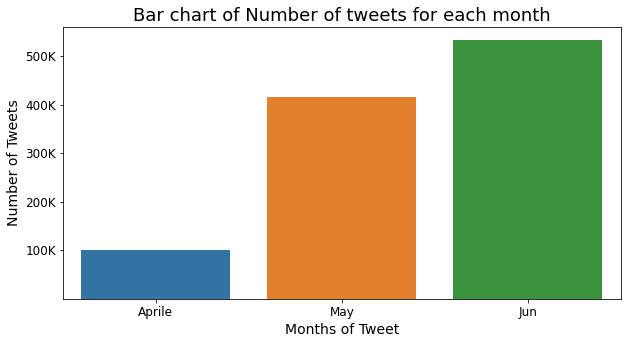

In [57]:
#Bar chart of Number of tweets for each month
plt.figure(figsize=(10,5))
sns.countplot(df['Month'])
plt.title('Bar chart of Number of tweets for each month',fontsize=18)
plt.xlabel('Months of Tweet',fontsize=14)
plt.ylabel('Number of Tweets',fontsize=14)
plt.xticks(range(3),['Aprile','May','Jun'],fontsize=12)
plt.yticks([100000,200000,300000,400000,500000],['100K','200K','300K','400K','500K'],fontsize=12)
plt.show()

In [58]:
# df_1=df.copy()

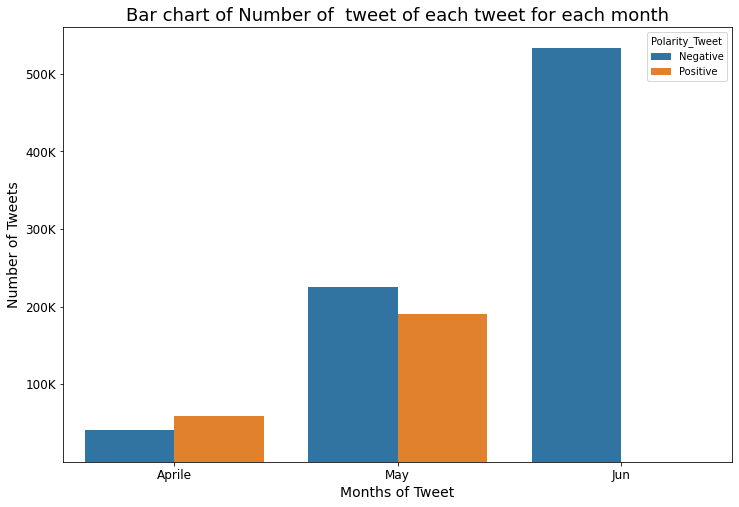

In [59]:
#Bar chart of Number of  tweet of each tweet for each month
plt.figure(figsize=(12,8))
sns.countplot(df['Month'],hue=df['Polarity_Tweet'])
plt.title('Bar chart of Number of  tweet of each tweet for each month',fontsize=18)
plt.xlabel('Months of Tweet',fontsize=14)
plt.ylabel('Number of Tweets',fontsize=14)
plt.xticks(range(3),['Aprile','May','Jun'],fontsize=12)
plt.yticks([100000,200000,300000,400000,500000],['100K','200K','300K','400K','500K'],fontsize=12)
plt.show()

In [60]:
df.groupby(['Polarity_Tweet','Month'])['Month'].value_counts()

Polarity_Tweet  Month  Month
Negative        4      4         41607
                5      5        224899
                6      6        533671
Positive        4      4         58418
                5      5        190289
                6      6            51
Name: Month, dtype: int64

### Number of tweet for week days

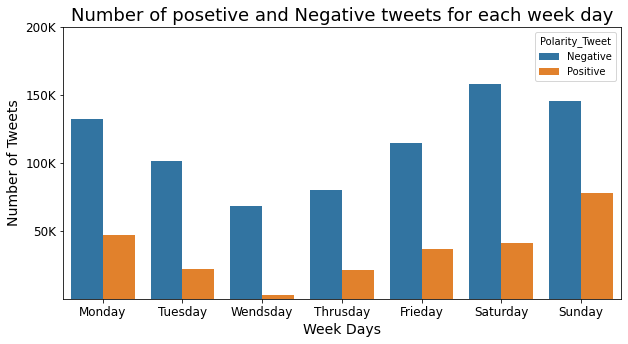

In [61]:
#Number of posetive and Negative tweets for each week day
plt.figure(figsize=(10,5))
sns.countplot(df['WeekDay'],hue=df['Polarity_Tweet'])
plt.title('Number of posetive and Negative tweets for each week day',fontsize=18)
plt.xlabel('Week Days',fontsize=14)
plt.ylabel('Number of Tweets',fontsize=14)
plt.xticks(range(7),['Monday','Tuesday','Wendsday','Thrusday','Frieday','Saturday','Sunday'],fontsize=12)
plt.yticks([50000,100000,150000,200000],['50K','100K','150K','200K'],fontsize=12)
plt.show()

## Total number of tweets for each week day of each month

In [62]:
df_=df.copy()

In [63]:
## function used to convert month values
def month_tostr(mon):
    if mon==4:
        return 'Aprile'
    elif mon==5:
        return 'May'
    else:
        return 'Jun'

In [64]:
df_['Month']=df_['Month'].apply(month_tostr)

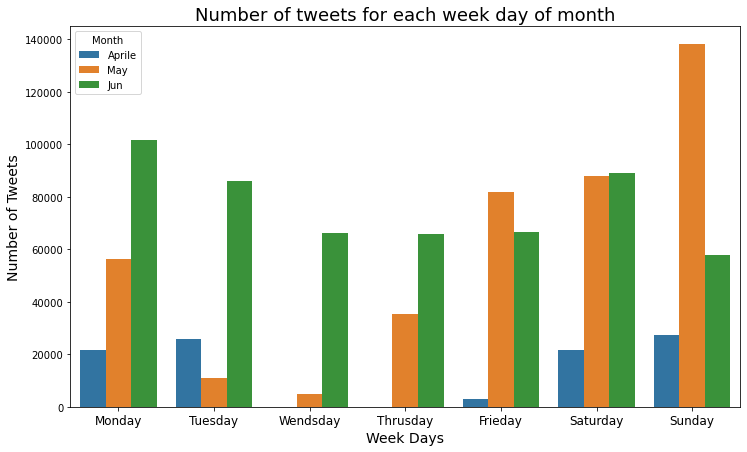

In [65]:
#Number of tweets for each week day of month
plt.figure(figsize=(12,7))

sns.countplot(df_['WeekDay'],hue=df_['Month'])
plt.title('Number of tweets for each week day of month',fontsize=18)
plt.xlabel('Week Days',fontsize=14)
plt.ylabel('Number of Tweets',fontsize=14)
plt.xticks(range(7),['Monday','Tuesday','Wendsday','Thrusday','Frieday','Saturday','Sunday'],fontsize=12)
#plt.yticks([50000,100000,150000,200000],['50K','100K','150K','200K'],fontsize=12)
plt.show()

### Barchart of Each day for each polarity tweet

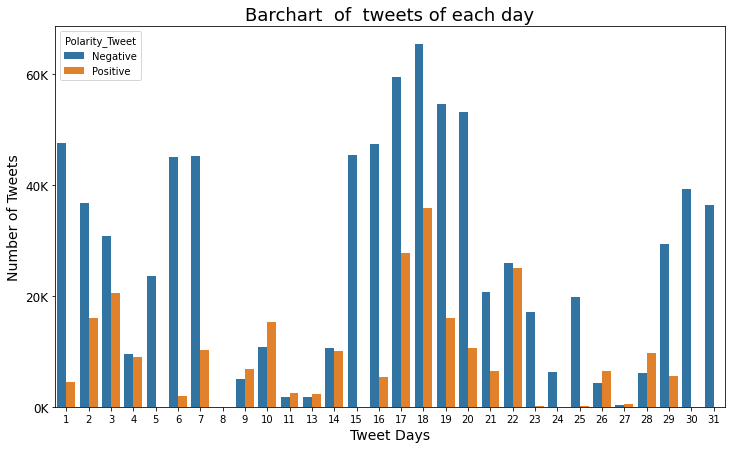

In [66]:
##Barchart  of  tweets of each day of the negative and positive tweet
plt.figure(figsize=(12,7))    
sns.countplot(df['Day'],hue=df['Polarity_Tweet'])
plt.title('Barchart  of  tweets of each day',fontsize=18)
plt.xlabel('Tweet Days',fontsize=14)
plt.ylabel('Number of Tweets',fontsize=14)
plt.yticks([0,20000,40000,60000],['0K','20K','40K','60K'],fontsize=12)
plt.show()

### Barchart of each polarity for month Aprile

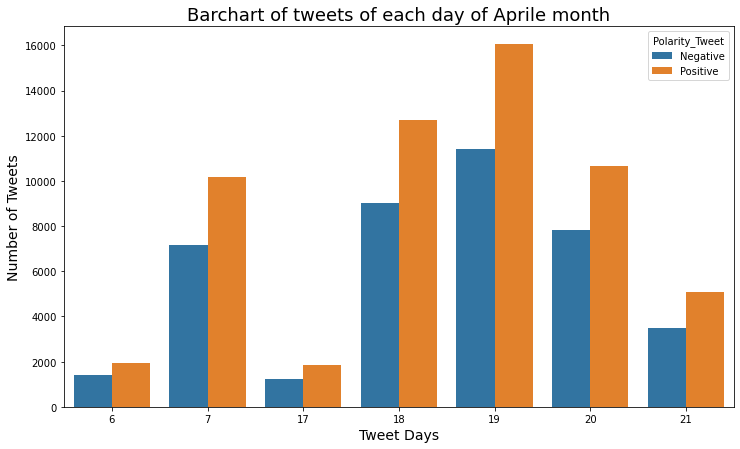

In [67]:
#Barchart of tweets of each day of Aprile month
plt.figure(figsize=(12,7))
sns.countplot(df[df['Month']==4]['Day'],hue=df[df['Month']==4]['Polarity_Tweet'])
plt.title('Barchart of tweets of each day of Aprile month',fontsize=18)
plt.xlabel('Tweet Days',fontsize=14)
plt.ylabel('Number of Tweets',fontsize=14)    
plt.show()

### Barchart of each polarity for month May

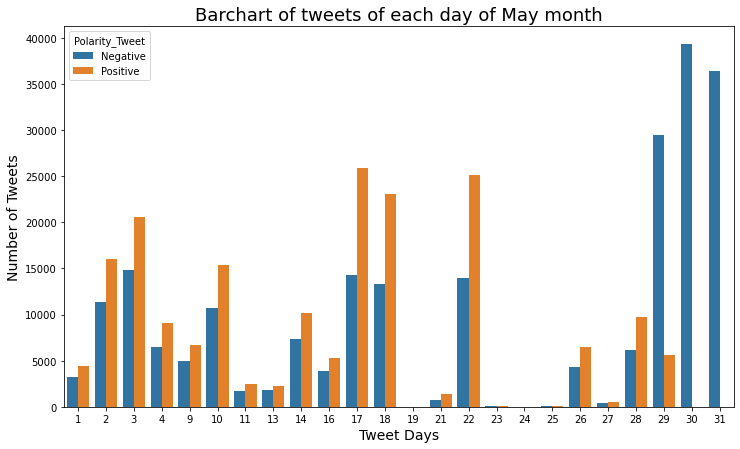

In [68]:
#Barchart of tweets of each day of May month
plt.figure(figsize=(12,7))
sns.countplot(df[df['Month']==5]['Day'],hue=df[df['Month']==5]['Polarity_Tweet'])
plt.title('Barchart of tweets of each day of May month',fontsize=18)
plt.xlabel('Tweet Days',fontsize=14)
plt.ylabel('Number of Tweets',fontsize=14)    
plt.show()

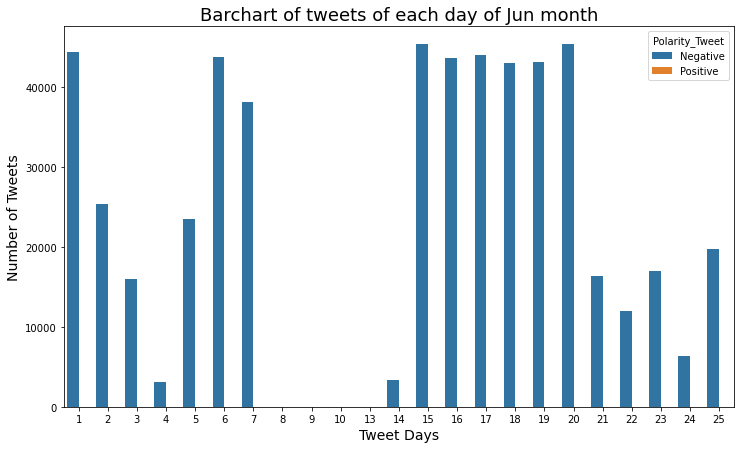

In [69]:
#Barchart of tweets of each day of Jun month
plt.figure(figsize=(12,7))
sns.countplot(df[df['Month']==6]['Day'],hue=df[df['Month']==6]['Polarity_Tweet'])
plt.title('Barchart of tweets of each day of Jun month',fontsize=18)
plt.xlabel('Tweet Days',fontsize=14)
plt.ylabel('Number of Tweets',fontsize=14)    
plt.show()

### Barchart of each polarity for month Jun

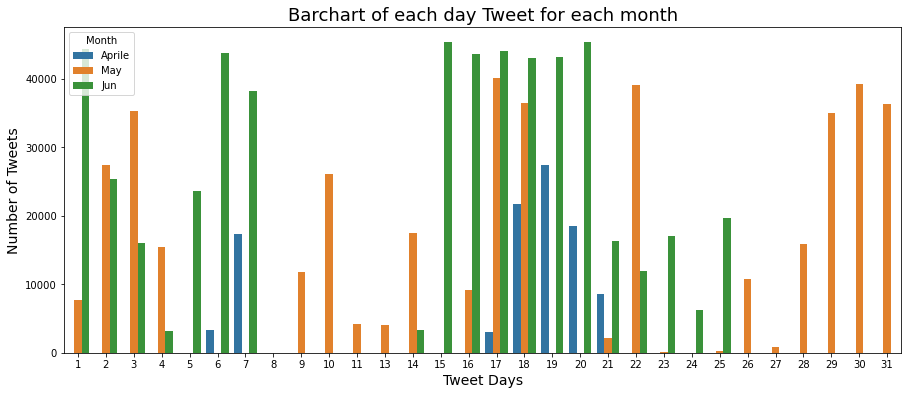

In [71]:
#Barchart of each day Tweet for each month'
plt.figure(figsize=(15,6))
sns.countplot(df_['Day'],hue=df_['Month'])
plt.title('Barchart of each day Tweet for each month',fontsize=18)
plt.xlabel('Tweet Days',fontsize=14)
plt.ylabel('Number of Tweets',fontsize=14)
plt.show()

### Text mining

In [72]:
## to translate the emojies symbol into equivalent words
def emoji_translation(text):
    for el in [":)",":-)",": )",":D","=)"]:
          text=text.replace(el,"smile")
    for el in ["(",":-(",": ("]:
          text=text.replace(el,"smile")   
         
    return text

In [73]:
# text=":) :( how are you doing men : ( :-("
# emoji_translation(text)

In [74]:
### removing urls:https:// or http://
def remove_url(text):
    #change the text into lowwer case
    text=text.lower()
    text=re.sub('(http|https):\/\/\S+',' ',text)#use capital S to getrade of any folllowing characters of http:// or
    ##to remove hash tag
    text=re.sub('#+',' ',text)
    return text


In [75]:
## delete the tweet names
def remove_tweetname(text):
    text=re.sub('\B@\w+','',text)
    return text

In [76]:
def remove_repeated_character(text):###like soooo===>so
    text=re.sub(r'(.)\1+',r'\1\1',text)
    return text

In [356]:
!pip install contractions

In [77]:
import contractions

In [80]:
## expand contracted words
def expand_contractedWords(text):
    text=contractions.fix(text)
    return text    

In [82]:
expand_contractedWords("I am working here. I'm not working today you'll")

'I am working here. I am not working today you will'

In [84]:
## remove alpha numeric
def remove_alpha_numeric(text):
    text=re.sub(r'[^a-zA-Z]+',' ',text)
    return text

In [85]:
remove_alpha_numeric("I am working here. I'm not working today you'll 2 3 4 5")

'I am working here I m not working today you ll '

In [86]:
### remove puctuations
import string

In [87]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [88]:
## to remove panctuations
def remove_punctuation(text):
    text=[token for token in text if token not in string.punctuation]
    text=''.join(text)
    return text

In [89]:
### remove stop words

In [90]:
## import the stop words
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aklil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [91]:
len(stopwords.words('english'))

179

In [92]:
## to remove the stop words 
def remove_stopwords(text):
    stop_words=stopwords.words('english')
    text=[token for token in text if token not in stop_words]
    text=''.join(text)
    return text

In [93]:
# from nltk.stem import WordNetLemmatizer
# from nltk.corpus import wordnet
# nltk.download('wordnet')

### the lemmatization will be done by the help of spacy library

In [94]:
import spacy

In [95]:
nlp = spacy.load('en_core_web_sm')

In [96]:
### lametization
def lematization(text):
    words=[]
    text_=nlp(text)
    for token in text_:
        if len(token)>1:
            words.append(token.lemma_)
    text=' '.join(words)
    return text  
    

In [97]:
## change the case of the tweet to lower case
def lower_case(text):
    text=text.lower()
    return text

In [98]:
### Apply all functions mentioned above to clean the data
## change the emoji to its equivalent smile or sad
df['Text']=df['Text'].apply(emoji_translation)
## remove urls
df['Text']=df['Text'].apply(remove_url)
##remove tweetnames @username
df['Text']=df['Text'].apply(remove_tweetname)
##remove repeated character like sooooooo
df['Text']=df['Text'].apply(remove_repeated_character)
## expand contracted words
df['Text']=df['Text'].apply(expand_contractedWords)
## remove punctuations
df['Text']=df['Text'].apply(remove_punctuation)
## remove stop words
df['Text']=df['Text'].apply(remove_stopwords)
##remove digits
df['Text']=df['Text'].apply(remove_alpha_numeric)
##change to lower case
df['Text']=df['Text'].apply(lower_case)
## lametize the words
df['Text']=df['Text'].apply(lematization)

### Feature Enginering

In [ ]:
X=df['Text']
y=df['Polarity_Tweet']

In [ ]:
### imort important libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

### Data Modeling

In [ ]:
## import important libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import  xgboost as xgb
from xgboost import XGBClassifier
import tensorflow
import keras
import LSTM
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import average_precision_score,confusion_matrix,accuracy_score,classification_report,plot_confusion_matrix

#### The following classification models will be used to predict the sentiment of each tweet
         1. Linear Discrimnant Analysis 
         2. Quadratic Discriminant Analysis
         3. Suportive Vector Machine
         4. Gaussian Naive Bayes
         5. Logistic Regression
         6. K-Nearst Neighbors classifier
         7. Decision Trees
         8. Random Forest
         9. Gradient Boosting
         10. Adaptive Boosting
         11. CatBoos Classifier
         12. Light Gradient Boosting
         13. Extreme Gradient Boosting
         14. LSTM